<a href="https://colab.research.google.com/github/mandudu/Deep-Learning-Projects/blob/main/ResNet-CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Batch normalization (2 points)

Please make use of the model code from Homework 5 question 2 as you work on this question.

1. If your model didn't use batch normalization, add it. If it already had batch normalization, remove it. How does the performance change? Please experiment with different learning rate values, since batch normalization can allow a different range of learning rates to work. You are welcome to write your own batch norm implementaiton or use a pre-existing one from mxnet or pytorch.
1. Plot the squared L2 norm of gradients with respect to parameters over the course of training with and without batch normalization. To do this, you will need to compute the gradient of the loss over some data with respect to each parameter, square these gradients, and sum the result across all parameters. You can compute this value at each training step, or after each epoch. What difference does batch normalization make in terms of the squared L2 norm of gradients?

**Answer for Question 1** 

After including batch normalization into my model, the performance has increased by 9% from 75% -> 84%. Furthermore, by using batch normalization, the model helped optimization faster.   

learning rate: 0.05 (10%)

learning rate: 0.001 (83.52%)

learning rate: 0.005 (77.18%)

learning rate: 0.0001 (82.50%)



**Answer for Question 2**

Without implementing the batch normalization, L2 norm of gradients can either become extremely large or small. Large gradients could punish the model by overshooting the loss function, and small gradients can get stuck on the minimum value. 

This could be resolved by implementing Batch normalization because BN normalizes the input to each layers so that it stabalizes the optimization process. This could prevent the gradient values to become extremely large or too small.    

By looking at two different graphs that is shown in the last two models, it shows that batch normalization model has constantly decreasing L2 norm gradient, whereas L2 norm gradient was increasing without batch normalization.This shows that the model with batch normalization's optimization algorithm is finding better parameter values to a better performance and stability.   


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
  car   cat plane  deer


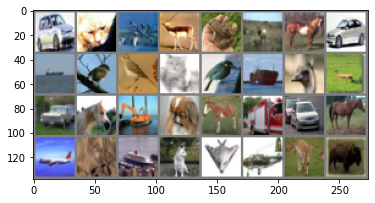

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)
 
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=True)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assume that we are on a CUDA machine, then this should print a CUDA device:

print(device)

cuda:0


In [3]:
import torch.nn as nn
import torch.nn.functional as F
from collections import OrderedDict
import torch.optim as optim

class AlexNet(nn.Module):
    def __init__(self):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3,64,3), nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2,2),
            nn.Conv2d(64, 192, 3, padding=1), nn.ReLU(),
            nn.BatchNorm2d(192),
            nn.MaxPool2d(2,2),
            nn.Conv2d(192, 384, 3, padding=1), nn.ReLU(),
            nn.BatchNorm2d(384),
            nn.Conv2d(384, 256, 3, padding=1), nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.Conv2d(256, 256, 1), nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.MaxPool2d(2,2))
        
        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(256*3*3, 1024), nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(1024,512), nn.ReLU(),
            nn.Linear(512,10))
    
    def forward(self, x):
        x = self.features(x)
        x = x.view(-1, 256*3*3)
        x = self.classifier(x)
        return x

criterion = nn.CrossEntropyLoss()
alexnet = AlexNet().to(device)
optimizer = optim.Adam(alexnet.parameters(), lr=0.001)

loss_ =[]
 
for epoch in range(50):
    running_loss = 0.0
    for data in trainloader:
        inputs, labels = data[0].cuda(), data[1].cuda()
        optimizer.zero_grad()
        outputs = alexnet(inputs).cuda()
        loss = criterion(outputs, labels) 
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
    loss_.append(running_loss / len(trainloader))
    print('[%d] loss: %.3f' %(epoch +1, running_loss / len(trainloader)))


[1] loss: 1.318
[2] loss: 0.918
[3] loss: 0.749
[4] loss: 0.622
[5] loss: 0.541
[6] loss: 0.464
[7] loss: 0.402
[8] loss: 0.346
[9] loss: 0.300
[10] loss: 0.262
[11] loss: 0.235
[12] loss: 0.215
[13] loss: 0.186
[14] loss: 0.179
[15] loss: 0.160
[16] loss: 0.154
[17] loss: 0.134
[18] loss: 0.129
[19] loss: 0.122
[20] loss: 0.119
[21] loss: 0.106
[22] loss: 0.106
[23] loss: 0.097
[24] loss: 0.092
[25] loss: 0.089
[26] loss: 0.077
[27] loss: 0.080
[28] loss: 0.082
[29] loss: 0.072
[30] loss: 0.078
[31] loss: 0.070
[32] loss: 0.070
[33] loss: 0.068
[34] loss: 0.066
[35] loss: 0.063
[36] loss: 0.065
[37] loss: 0.060
[38] loss: 0.057
[39] loss: 0.064
[40] loss: 0.058
[41] loss: 0.051
[42] loss: 0.060
[43] loss: 0.053
[44] loss: 0.051
[45] loss: 0.054
[46] loss: 0.049
[47] loss: 0.053
[48] loss: 0.049
[49] loss: 0.051
[50] loss: 0.043


GroundTruth:   ship  frog  frog   cat
Predicted:  plane   car  deer   dog


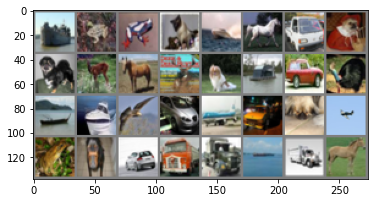

In [4]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

outputs = alexnet(inputs)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [5]:
correct = 0
total = 0
with torch.no_grad():
    alexnet.eval()
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = alexnet(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print('Test accuracy: %.2f %%' % (100 * correct / total))

Test accuracy: 82.48 %


In [6]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = alexnet(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 87 %
Accuracy of   car : 93 %
Accuracy of  bird : 73 %
Accuracy of   cat : 73 %
Accuracy of  deer : 80 %
Accuracy of   dog : 69 %
Accuracy of  frog : 85 %
Accuracy of horse : 86 %
Accuracy of  ship : 88 %
Accuracy of truck : 88 %


[1] loss: 1.328, grad_norm: 60364.962
[2] loss: 0.918, grad_norm: 78869.972
[3] loss: 0.748, grad_norm: 80461.840
[4] loss: 0.629, grad_norm: 77023.470
[5] loss: 0.542, grad_norm: 72789.171
[6] loss: 0.463, grad_norm: 68818.368
[7] loss: 0.394, grad_norm: 63048.951
[8] loss: 0.346, grad_norm: 59443.647
[9] loss: 0.297, grad_norm: 53000.858
[10] loss: 0.266, grad_norm: 52061.745
[11] loss: 0.231, grad_norm: 47854.536
[12] loss: 0.209, grad_norm: 45541.735
[13] loss: 0.187, grad_norm: 43623.203
[14] loss: 0.172, grad_norm: 39369.627
[15] loss: 0.159, grad_norm: 36469.045
[16] loss: 0.144, grad_norm: 33929.543
[17] loss: 0.135, grad_norm: 32661.002
[18] loss: 0.128, grad_norm: 32012.475
[19] loss: 0.118, grad_norm: 29245.091
[20] loss: 0.113, grad_norm: 28138.528
[21] loss: 0.110, grad_norm: 26667.423
[22] loss: 0.101, grad_norm: 23969.012
[23] loss: 0.095, grad_norm: 23208.363
[24] loss: 0.090, grad_norm: 22437.520
[25] loss: 0.090, grad_norm: 22064.329
[26] loss: 0.086, grad_norm: 20318

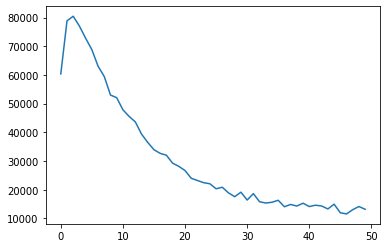

In [7]:
import torch.nn as nn
import torch.nn.functional as F
from collections import OrderedDict
import torch.optim as optim
import matplotlib.pyplot as plt

class AlexNet_L2(nn.Module):
    def __init__(self):
        super(AlexNet_L2, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, 3), nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(64, 192, 3, padding=1), nn.ReLU(),
            nn.BatchNorm2d(192),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(192, 384, 3, padding=1), nn.ReLU(),
            nn.BatchNorm2d(384),
            nn.Conv2d(384, 256, 3, padding=1), nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.Conv2d(256, 256, 1), nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.MaxPool2d(2, 2))
        
        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(256*3*3, 1024), nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(1024, 512), nn.ReLU(),
            nn.Linear(512, 10))
    
    def forward(self, x):
        x = self.features(x)
        x = x.view(-1, 256*3*3)
        x = self.classifier(x)
        return x

criterion = nn.CrossEntropyLoss()
alexnet_L2 = AlexNet_L2().to(device)
optimizer = optim.Adam(alexnet_L2.parameters(), lr=0.001)

losses = []
grad_norms = []  # squared L2 norm of gradients

for epoch in range(50):
    running_loss = 0.0
    total_grad_norm = 0.0
    
    for i, data in enumerate(trainloader):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = alexnet_L2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        # compute and accumulate the squared L2 norm of gradients for each parameter
        grad_norm = 0.0
        for p in alexnet_L2.parameters():
            if p.grad is not None:
                grad_norm += (p.grad.norm()**2).item()
        total_grad_norm += grad_norm
        
    losses.append(running_loss / len(trainloader))
    grad_norms.append(total_grad_norm)
    
    print('[%d] loss: %.3f, grad_norm: %.3f' % (epoch + 1, losses[-1], grad_norms[-1]))
    
L2_copy = torch.tensor(grad_norms).detach().cpu().numpy()
plt.plot(L2_copy)
    







GroundTruth:  plane  frog truck   car
Predicted:  horse   dog truck  deer


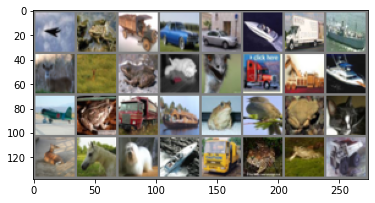

In [8]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

outputs = alexnet_L2(inputs)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [9]:
correct = 0
total = 0
with torch.no_grad():
    alexnet_L2.eval()
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = alexnet_L2(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print('Test accuracy: %.2f %%' % (100 * correct / total))

Test accuracy: 83.88 %


In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from collections import OrderedDict
import torch.optim as optim
import matplotlib.pyplot as plt

class AlexNet_L2_norm_withoutBN(nn.Module):
    def __init__(self):
        super(AlexNet_L2_norm_withoutBN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3,64,3), nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(64, 192, 3, padding=1), nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(192, 384, 3, padding=1), nn.ReLU(),
            nn.Conv2d(384, 256, 3, padding=1), nn.ReLU(),
            nn.Conv2d(256, 256, 1), nn.ReLU(),
            nn.MaxPool2d(2,2))
        
        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(256*3*3, 1024), nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(1024,512), nn.ReLU(),
            nn.Linear(512,10))
    
    def forward(self, x):
        x = self.features(x)
        x = x.view(-1, 256*3*3)
        x = self.classifier(x)
        return x

criterion = nn.CrossEntropyLoss()
alexnet_L2 = AlexNet_L2_norm_withoutBN().to(device)
optimizer = optim.Adam(alexnet_L2.parameters(), lr=0.001)

losses = []
grad_norms = []  # squared L2 norm of gradients

for epoch in range(50):
    running_loss = 0.0
    total_grad_norm = 0.0
    
    for i, data in enumerate(trainloader):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = alexnet_L2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        # compute and accumulate the squared L2 norm of gradients for each parameter
        grad_norm = 0.0
        for p in alexnet_L2.parameters():
            if p.grad is not None:
                grad_norm += (p.grad.norm()**2).item()
        total_grad_norm += grad_norm
        
    losses.append(running_loss / len(trainloader))
    grad_norms.append(total_grad_norm)
    
    print('[%d] loss: %.3f, grad_norm: %.3f' % (epoch + 1, losses[-1], grad_norms[-1]))
    
L2_copy = torch.tensor(grad_norms).detach().cpu().numpy()
plt.plot(L2_copy)

[1] loss: 1.639, grad_norm: 23535.808
[2] loss: 1.243, grad_norm: 36179.769
[3] loss: 1.066, grad_norm: 44170.072
[4] loss: 0.946, grad_norm: 51274.101
[5] loss: 0.866, grad_norm: 55770.950
[6] loss: 0.800, grad_norm: 58292.291
[7] loss: 0.743, grad_norm: 59295.503
[8] loss: 0.705, grad_norm: 62362.186
[9] loss: 0.667, grad_norm: 66847.291
[10] loss: 0.629, grad_norm: 68538.195
[11] loss: 0.595, grad_norm: 72324.677
[12] loss: 0.571, grad_norm: 77436.238
[13] loss: 0.540, grad_norm: 80242.876
[14] loss: 0.509, grad_norm: 80244.379
[15] loss: 0.497, grad_norm: 87832.323
[16] loss: 0.478, grad_norm: 87285.101
[17] loss: 0.457, grad_norm: 94044.713
[18] loss: 0.437, grad_norm: 94902.570
[19] loss: 0.420, grad_norm: 96973.690
[20] loss: 0.407, grad_norm: 102824.906
[21] loss: 0.383, grad_norm: 102756.707
[22] loss: 0.361, grad_norm: 105671.291
[23] loss: 0.351, grad_norm: 109978.091
[24] loss: 0.338, grad_norm: 112826.707
[25] loss: 0.330, grad_norm: 115736.934
[26] loss: 0.326, grad_norm:

In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

outputs = alexnet_L2(inputs)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    alexnet_L2.eval()
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = alexnet_L2(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print('Test accuracy: %.2f %%' % (100 * correct / total))

# 2. Residual connections (2 points)

Please make use of the model code from Homework 5 question 2 as you work on this question.

If your model didn't use residual connections, add them. If it already had residual connections, remove them. How does the performance change? Please experiment with applying residual connections around different blocks, where a block is a subset of layers (for example, add a residual connection around a single convolution/nonlinearity combination, or a residual connection around two convolution/nonlinearity combinations). Note that you may need to add 1x1 convolutions in the residual path if your block changes the shape (spatial or number of channels) of the input.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from collections import OrderedDict
import torch.optim as optim

class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding = 1)
        self.relu = nn.ReLU(inplace=True)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding = 1)
        self.relu = nn.ReLU(inplace=True)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.stride = stride
        
        # If input and output shapes are not the same, apply a 1x1 convolution to match the shapes
        if in_channels != out_channels:
            self.downsample = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride),
                nn.BatchNorm2d(out_channels)
            )
        else:
            self.downsample = None
    
    def forward(self, x):
        identity = x
        
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        
        out = self.conv2(out)
        out = self.bn2(out)
        
        if self.downsample is not None:
            identity = self.downsample(x)
        
        out += identity
        out = self.relu(out)
        
        return out

class ResNet(nn.Module):
    def __init__(self):
        super(ResNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3,64,3), nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2,2),
            
            ResidualBlock(64, 192),
            nn.MaxPool2d(2,2),
            
            ResidualBlock(192, 384),
            ResidualBlock(384, 256),
            nn.Conv2d(256, 256, 1), nn.ReLU(),
            nn.BatchNorm2d(256),
            
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        
        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(256*3*3, 1024), nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(1024,512), nn.ReLU(),
            nn.Linear(512,10))
        
    
    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

criterion = nn.CrossEntropyLoss()
resnet = ResNet().to(device)
optimizer = optim.Adam(resnet.parameters(), lr=0.001)

losses = []
grad_norms = []


 
for epoch in range(50):
    running_loss = 0.0
    total_grad_norm = 0.0
    for data in trainloader:
        inputs, labels = data[0].cuda(), data[1].cuda()
        optimizer.zero_grad()
        outputs = resnet(inputs).cuda()
        loss = criterion(outputs, labels) 
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        grad_norm = 0.0

        for p in resnet.parameters():
            if p.grad is not None:
                grad_norm += (p.grad.norm()**2).item()
        total_grad_norm += grad_norm
        
    losses.append(running_loss / len(trainloader))
    grad_norms.append(total_grad_norm)
    
    print('[%d] loss: %.3f, grad_norm: %.3f' % (epoch + 1, losses[-1], grad_norms[-1]))
    
L2_copy = torch.tensor(grad_norms).detach().cpu().numpy()
plt.plot(L2_copy)
    



In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

outputs = resnet(inputs)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    resnet.eval()
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = resnet(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print('Test accuracy: %.2f %%' % (100 * correct / total))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from collections import OrderedDict
import torch.optim as optim

class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding = 1)
        self.relu = nn.ReLU(inplace=True)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding = 1)
        self.relu = nn.ReLU(inplace=True)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.stride = stride
        
        # If input and output shapes are not the same, apply a 1x1 convolution to match the shapes
        if in_channels != out_channels:
            self.downsample = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride),
                nn.BatchNorm2d(out_channels)
            )
        else:
            self.downsample = None
    
    def forward(self, x):
        identity = x
        
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        
        out = self.conv2(out)
        out = self.bn2(out)
        
        if self.downsample is not None:
            identity = self.downsample(x)
        
        out += identity
        out = self.relu(out)
        
        return out

class ResNet(nn.Module):
    def __init__(self):
        super(ResNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3,64,3), nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2,2),
            
            ResidualBlock(64, 192),
            nn.MaxPool2d(2,2),
            
            ResidualBlock(192, 384),
            nn.Conv2d(384, 256, 3, padding = 1), nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.Conv2d(256, 256, 1), nn.ReLU(),
            nn.BatchNorm2d(256),
            
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        
        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(256*3*3, 1024), nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(1024,512), nn.ReLU(),
            nn.Linear(512,10))
        
    
    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

criterion = nn.CrossEntropyLoss()
resnet = ResNet().to(device)
optimizer = optim.Adam(resnet.parameters(), lr=0.001)

losses = []
grad_norms = []
 
losses = []
grad_norms = []


 
for epoch in range(50):
    running_loss = 0.0
    total_grad_norm = 0.0
    for data in trainloader:
        inputs, labels = data[0].cuda(), data[1].cuda()
        optimizer.zero_grad()
        outputs = resnet(inputs).cuda()
        loss = criterion(outputs, labels) 
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        grad_norm = 0.0

        for p in resnet.parameters():
            if p.grad is not None:
                grad_norm += (p.grad.norm()**2).item()
        total_grad_norm += grad_norm
        
    losses.append(running_loss / len(trainloader))
    grad_norms.append(total_grad_norm)
    
    print('[%d] loss: %.3f, grad_norm: %.3f' % (epoch + 1, losses[-1], grad_norms[-1]))
    
L2_copy = torch.tensor(grad_norms).detach().cpu().numpy()
plt.plot(L2_copy)
    

In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

outputs = resnet(inputs)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    resnet.eval()
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = resnet(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print('Test accuracy: %.2f %%' % (100 * correct / total))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from collections import OrderedDict
import torch.optim as optim

class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding = 1)
        self.relu = nn.ReLU(inplace=True)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding = 1)
        self.relu = nn.ReLU(inplace=True)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.stride = stride
        
        # If input and output shapes are not the same, apply a 1x1 convolution to match the shapes
        if in_channels != out_channels:
            self.downsample = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride),
                nn.BatchNorm2d(out_channels)
            )
        else:
            self.downsample = None
    
    def forward(self, x):
        identity = x
        
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        
        out = self.conv2(out)
        out = self.bn2(out)
        
        if self.downsample is not None:
            identity = self.downsample(x)
        
        out += identity
        out = self.relu(out)
        
        return out

class ResNet(nn.Module):
    def __init__(self):
        super(ResNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3,64,3), nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2,2),
            
            ResidualBlock(64, 192),
            nn.MaxPool2d(2,2),
            
            ResidualBlock(192, 384),
            ResidualBlock(384, 256),
            ResidualBlock(256, 256),
            
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        
        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(256*3*3, 1024), nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(1024,512), nn.ReLU(),
            nn.Linear(512,10))
        
    
    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

criterion = nn.CrossEntropyLoss()
resnet = ResNet().to(device)
optimizer = optim.Adam(resnet.parameters(), lr=0.001)

losses = []
grad_norms = []
 
for epoch in range(50):
    running_loss = 0.0
    total_grad_norm = 0.0

    for data in trainloader:
        inputs, labels = data[0].cuda(), data[1].cuda()
        optimizer.zero_grad()
        outputs = resnet(inputs).cuda()
        loss = criterion(outputs, labels) 
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        for p in resnet.parameters():
            if p.grad is not None:
                grad_norm += (p.grad.norm()**2).item()
        total_grad_norm += grad_norm
        
    losses.append(running_loss / len(trainloader))
    grad_norms.append(total_grad_norm)
    
    print('[%d] loss: %.3f, grad_norm: %.3f' % (epoch + 1, losses[-1], grad_norms[-1]))
    
L2_copy = torch.tensor(grad_norms).detach().cpu().numpy()
plt.plot(L2_copy)
    

In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

outputs = resnet(inputs)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    resnet.eval()
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = resnet(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print('Test accuracy: %.2f %%' % (100 * correct / total))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from collections import OrderedDict
import torch.optim as optim

class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding = 1)
        self.relu = nn.ReLU(inplace=True)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding = 1)
        self.relu = nn.ReLU(inplace=True)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.stride = stride
        
        # If input and output shapes are not the same, apply a 1x1 convolution to match the shapes
        if in_channels != out_channels:
            self.downsample = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride),
                nn.BatchNorm2d(out_channels)
            )
        else:
            self.downsample = None
    
    def forward(self, x):
        identity = x
        
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        
        out = self.conv2(out)
        out = self.bn2(out)
        
        if self.downsample is not None:
            identity = self.downsample(x)
        
        out += identity
        out = self.relu(out)
        
        return out

class ResNet(nn.Module):
    def __init__(self):
        super(ResNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3,64,3), nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2,2),
            
            nn.Conv2d(64,192,3), nn.ReLU(),
            nn.BatchNorm2d(192),
            nn.MaxPool2d(2,2),
            
            ResidualBlock(192, 384),
            ResidualBlock(384, 256),
            ResidualBlock(256, 256),
            
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        
        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(256*3*3, 1024), nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(1024,512), nn.ReLU(),
            nn.Linear(512,10))
        
    
    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

criterion = nn.CrossEntropyLoss()
resnet = ResNet().to(device)
optimizer = optim.Adam(resnet.parameters(), lr=0.001)

losses = []
grad_norms = []
 
for epoch in range(50):
    running_loss = 0.0
    total_grad_norm = 0.0

    for data in trainloader:
        inputs, labels = data[0].cuda(), data[1].cuda()
        optimizer.zero_grad()
        outputs = resnet(inputs).cuda()
        loss = criterion(outputs, labels) 
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        for p in resnet.parameters():
            if p.grad is not None:
                grad_norm += (p.grad.norm()**2).item()
        total_grad_norm += grad_norm
        
    losses.append(running_loss / len(trainloader))
    grad_norms.append(total_grad_norm)
    
    print('[%d] loss: %.3f, grad_norm: %.3f' % (epoch + 1, losses[-1], grad_norms[-1]))
    
L2_copy = torch.tensor(grad_norms).detach().cpu().numpy()
plt.plot(L2_copy)
    

In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

outputs = resnet(inputs)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    resnet.eval()
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = resnet(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print('Test accuracy: %.2f %%' % (100 * correct / total))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from collections import OrderedDict
import torch.optim as optim

class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding = 1)
        self.relu = nn.ReLU(inplace=True)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding = 1)
        self.relu = nn.ReLU(inplace=True)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.stride = stride
        
        # If input and output shapes are not the same, apply a 1x1 convolution to match the shapes
        if in_channels != out_channels:
            self.downsample = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride),
                nn.BatchNorm2d(out_channels)
            )
        else:
            self.downsample = None
    
    def forward(self, x):
        identity = x
        
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        
        out = self.conv2(out)
        out = self.bn2(out)
        
        if self.downsample is not None:
            identity = self.downsample(x)
        
        out += identity
        out = self.relu(out)
        
        return out

class ResNet(nn.Module):
    def __init__(self):
        super(ResNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3,64,3), nn.ReLU(),
            nn.BatchNorm2d(64),

            nn.MaxPool2d(2,2),

            ResidualBlock(64, 192),

            nn.MaxPool2d(2,2),

            nn.Conv2d(192, 384, 3, padding=1), nn.ReLU(),
            nn.BatchNorm2d(384),

            nn.Conv2d(384, 256, 3, padding=1), nn.ReLU(),
            nn.BatchNorm2d(256),

            nn.Conv2d(256, 256, 1), nn.ReLU(),
            nn.BatchNorm2d(256),

            nn.MaxPool2d(2,2),
            
            )
         
        
        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(256*3*3, 1024), nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(1024,512), nn.ReLU(),
            nn.Linear(512,10))
        
    
    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

criterion = nn.CrossEntropyLoss()
ResNet = ResNet().to(device)
optimizer = optim.Adam(ResNet.parameters(), lr=0.001)

losses = []
grad_norms = []
 
for epoch in range(50):
    running_loss = 0.0
    total_grad_norm = 0.0

    for data in trainloader:
        inputs, labels = data[0].cuda(), data[1].cuda()
        optimizer.zero_grad()
        outputs = ResNet(inputs).cuda()
        loss = criterion(outputs, labels) 
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        for p in ResNet.parameters():
            if p.grad is not None:
                grad_norm += (p.grad.norm()**2).item()
        total_grad_norm += grad_norm
        
    losses.append(running_loss / len(trainloader))
    grad_norms.append(total_grad_norm)
    
    print('[%d] loss: %.3f, grad_norm: %.3f' % (epoch + 1, losses[-1], grad_norms[-1]))
    
L2_copy = torch.tensor(grad_norms).detach().cpu().numpy()
plt.plot(L2_copy)
    

In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

outputs = ResNet(inputs)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    ResNet.eval()
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = ResNet(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print('Test accuracy: %.2f %%' % (100 * correct / total))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from collections import OrderedDict
import torch.optim as optim

class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding = 1)
        self.relu = nn.ReLU(inplace=True)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding = 1)
        self.relu = nn.ReLU(inplace=True)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.stride = stride
        
        # If input and output shapes are not the same, apply a 1x1 convolution to match the shapes
        if in_channels != out_channels:
            self.downsample = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride),
                nn.BatchNorm2d(out_channels)
            )
        else:
            self.downsample = None
    
    def forward(self, x):
        identity = x
        
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        
        out = self.conv2(out)
        out = self.bn2(out)
        
        if self.downsample is not None:
            identity = self.downsample(x)
        
        out += identity
        out = self.relu(out)
        
        return out

class ResNet(nn.Module):
    def __init__(self):
        super(ResNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3,64,3), nn.ReLU(),
            nn.BatchNorm2d(64),

            nn.MaxPool2d(2,2),

            nn.Conv2d(64, 192, 3, padding=1), nn.ReLU(),
            nn.BatchNorm2d(192),

            nn.MaxPool2d(2,2),

            nn.Conv2d(192, 384, 3, padding=1), nn.ReLU(),
            nn.BatchNorm2d(384),

            nn.Conv2d(384, 256, 3, padding=1), nn.ReLU(),
            nn.BatchNorm2d(256),

            ResidualBlock(256, 256),

            nn.MaxPool2d(2,2),
            
            )
         
        
        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(256*3*3, 1024), nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(1024,512), nn.ReLU(),
            nn.Linear(512,10))
        
    
    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

criterion = nn.CrossEntropyLoss()
ResNet = ResNet().to(device)
optimizer = optim.Adam(ResNet.parameters(), lr=0.001)

losses = []
grad_norms = []
 
for epoch in range(50):
    running_loss = 0.0
    total_grad_norm = 0.0

    for data in trainloader:
        inputs, labels = data[0].cuda(), data[1].cuda()
        optimizer.zero_grad()
        outputs = ResNet(inputs).cuda()
        loss = criterion(outputs, labels) 
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
    loss_.append(running_loss / len(trainloader))
    print('[%d] loss: %.3f' %(epoch +1, running_loss / len(trainloader)))

In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

outputs = ResNet(inputs)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    ResNet.eval()
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = ResNet(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print('Test accuracy: %.2f %%' % (100 * correct / total))